In [3]:
%pylab inline
import pandas as pd
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


In [4]:
data= pd.read_csv("datos_2014_tenistas-csv.csv")
data

,TotalGames,Wins,Losses,Grass wins,Grass losses,Clay wins,Clay losses,Hard wins,Hard losses,Indoors wins,Indoors losses,Other wins,Other losses,Player
0,26,0.423077,0.576923,0.000000,0.076923,0.000000,0.384615,0.038462,0.076923,0,0,0.000000,0.000000,Pfizenmaier Dinah
1,27,0.518519,0.481481,0.074074,0.111111,0.222222,0.222222,0.222222,0.111111,0,0,0.000000,0.000000,Bedene Aljaz
2,41,0.560976,0.439024,0.073171,0.073171,0.121951,0.146341,0.243902,0.170732,0,0,0.000000,0.000000,Kuznetsov Alex
3,36,0.611111,0.388889,0.111111,0.083333,0.138889,0.111111,0.222222,0.138889,0,0,0.027778,0.027778,Giorgi Camila
4,21,0.666667,0.333333,0.238095,0.095238,0.238095,0.142857,0.190476,0.095238,0,0,0.000000,0.000000,Konjuh Ana
5,26,0.500000,0.500000,0.038462,0.076923,0.423077,0.269231,0.000000,0.115385,0,0,0.038462,0.038462,Berlocq Carlos
6,39,0.538462,0.461538,0.025641,0.076923,0.230769,0.205128,0.230769,0.128205,0,0,0.025641,0.025641,Lajovic Dusan
7,40,0.625000,0.375000,0.100000,0.075000,0.200000,0.175000,0.300000,0.125000,0,0,0.025000,0.000000,Falla Alejandro
8,33,0.606061,0.393939,0.333333,0.090909,0.030303,0.060606,0.242424,0.212121,0,0,0.000000,0.000000,Vandeweghe Coco
9,30,0.533333,0.466667,0.066667,0.133333,0.000000,0.066667,0.200000,0.133333,0,0,0.000000,0.000000,Evans Daniel


In [31]:
numeric_data = data.drop('Player', 1)
numeric_data = numeric_data.drop('TotalGames', 1)
numeric_data

,Wins,Losses,Grass wins,Grass losses,Clay wins,Clay losses,Hard wins,Hard losses,Indoors wins,Indoors losses,Other wins,Other losses
0,0.423077,0.576923,0.000000,0.076923,0.000000,0.384615,0.038462,0.076923,0,0,0.000000,0.000000
1,0.518519,0.481481,0.074074,0.111111,0.222222,0.222222,0.222222,0.111111,0,0,0.000000,0.000000
2,0.560976,0.439024,0.073171,0.073171,0.121951,0.146341,0.243902,0.170732,0,0,0.000000,0.000000
3,0.611111,0.388889,0.111111,0.083333,0.138889,0.111111,0.222222,0.138889,0,0,0.027778,0.027778
4,0.666667,0.333333,0.238095,0.095238,0.238095,0.142857,0.190476,0.095238,0,0,0.000000,0.000000
5,0.500000,0.500000,0.038462,0.076923,0.423077,0.269231,0.000000,0.115385,0,0,0.038462,0.038462
6,0.538462,0.461538,0.025641,0.076923,0.230769,0.205128,0.230769,0.128205,0,0,0.025641,0.025641
7,0.625000,0.375000,0.100000,0.075000,0.200000,0.175000,0.300000,0.125000,0,0,0.025000,0.000000
8,0.606061,0.393939,0.333333,0.090909,0.030303,0.060606,0.242424,0.212121,0,0,0.000000,0.000000
9,0.533333,0.466667,0.066667,0.133333,0.000000,0.066667,0.200000,0.133333,0,0,0.000000,0.000000


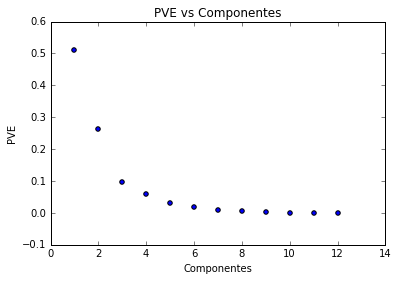

In [33]:
pca = PCA()
pve = pca.fit(numeric_data)
scatter(range(1,13), pve.explained_variance_ratio_)
title("PVE vs Componentes")
xlabel("Componentes")
ylabel("PVE")

In [35]:
components = pd.DataFrame(pve.components_)
components.columns = ["Wins", "Losses", "Grass Wins", "Grass Losses", "Clay Wins", "Clay Losses", "Hard Wins", "Hard Losses", "Indoor Wins", "Indoor Losses", "Other Wins", "Other Losses"]
components

,Wins,Losses,Grass Wins,Grass Losses,Clay Wins,Clay Losses,Hard Wins,Hard Losses,Indoor Wins,Indoor Losses,Other Wins,Other Losses
0,6.074218e-01,-6.074218e-01,1.046216e-01,-9.606184e-02,1.886439e-01,-2.783687e-01,3.156328e-01,-1.663813e-01,0.000000e+00,0.000000e+00,1.279931e-02,-3.684682e-02
1,-5.503224e-02,5.503224e-02,1.060820e-01,3.709117e-02,-7.565628e-01,-2.258750e-01,5.564466e-01,2.194250e-01,0.000000e+00,0.000000e+00,-1.025344e-02,-4.647701e-03
2,1.757467e-01,-1.757467e-01,3.955508e-01,3.380068e-02,-5.368629e-01,9.498347e-02,-5.892511e-01,-3.683488e-01,0.000000e+00,0.000000e+00,-2.243283e-03,-2.183974e-02
3,-8.604043e-02,8.604043e-02,5.207579e-01,1.369338e-01,2.140916e-01,-6.329308e-01,-2.579483e-01,4.244414e-01,0.000000e+00,0.000000e+00,1.777352e-02,4.259232e-02
4,-1.005885e-01,1.005885e-01,7.196603e-01,2.053683e-02,2.217106e-01,4.607999e-01,3.714709e-01,-1.160709e-01,0.000000e+00,0.000000e+00,-2.161965e-01,-4.165237e-02
5,1.415527e-01,-1.415527e-01,8.779892e-02,-6.393262e-01,-7.184424e-02,3.273300e-01,-1.448396e-01,5.986507e-01,0.000000e+00,0.000000e+00,1.803025e-01,-1.389324e-01
6,-9.183071e-02,9.183071e-02,1.449663e-01,-1.918248e-01,3.643050e-02,-2.764174e-02,1.143053e-01,-2.300475e-01,0.000000e+00,0.000000e+00,7.412492e-01,5.547911e-01
7,7.514409e-02,-7.514409e-02,2.745122e-02,5.523890e-01,2.125679e-02,2.005476e-01,2.974466e-02,1.520735e-01,0.000000e+00,0.000000e+00,5.922545e-01,-5.170801e-01
8,2.132736e-01,-2.132736e-01,-5.256666e-02,4.673466e-01,-4.327761e-02,3.184385e-01,-6.379145e-02,4.005437e-01,0.000000e+00,0.000000e+00,-1.412249e-01,6.325563e-01
9,-7.071020e-01,-7.071020e-01,9.714451e-17,1.942890e-16,0.000000e+00,5.551115e-17,1.387779e-16,-2.220446e-16,3.667917e-03,6.081941e-15,7.806256e-17,1.387779e-17
